**<H1> Assignment 1 part 1** 

**<h4>Background**  
- This is a dataset collected from the bank. The dataset contains various customer
information such as Gender, Education, Credit Limit, and Payment history. From the
perspective of risk management, the bank wants to build a classification model to
predict which customer will have default payment in the next month.  

**so we need to predict based on these few conditions**    
- Gender
- Education
- Credit Limit
- Payment History

**<h4>Evaluation Matrics**

For the bank it is important that it can predict people who default payment so it loses less money with its accuracy, Hence we need to use a classification matrics that tends to make less false negatives.

<!-- **<h5>F2 SCORE** -->

***<h4>To Start of With***  

*i need to import some revelant libraries to help me with the task with some that does visualisationa and some to help with the classification*

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

# Model Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_predict, cross_val_score, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Preprocessing
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import learning_curve, ShuffleSplit

# Models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings 
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('../CA1/credit_dataset.csv')
df1 = pd.read_csv('../CA1/credit_dataset.csv')


ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = df.drop('Customer ID', axis=1)


In [ ]:
print(df.shape)

(1600, 12)



**<h1>Visualising the dataset</h1>**
We need to visualise the dataset 
- to see if there is any correlation between the features and the target variable 
- to see the distribution of the columns


**<h2>Univariate Analysis</h2>**  
Analysis of each column individually

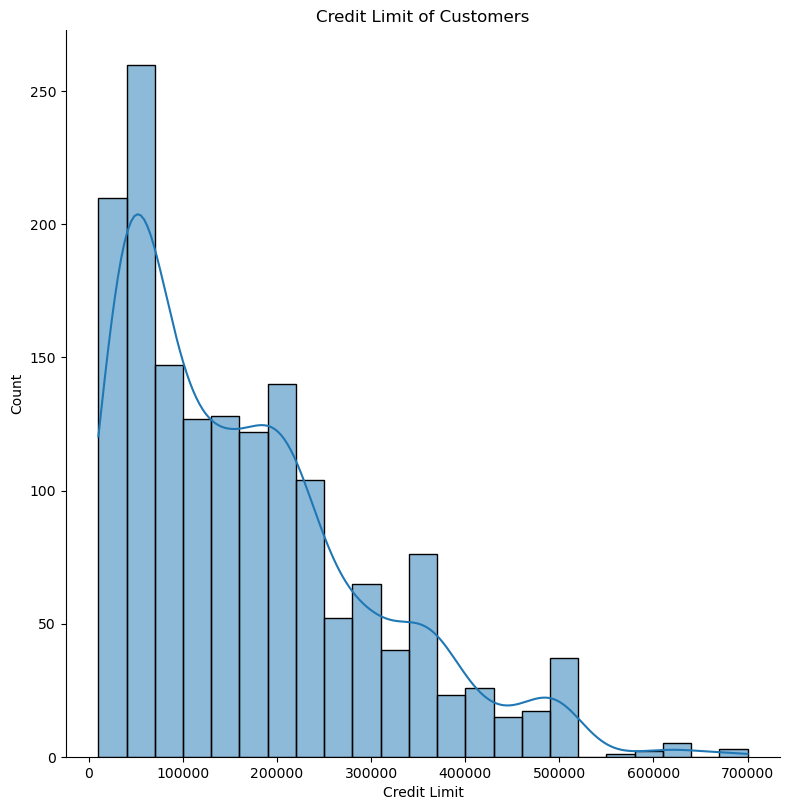

In [ ]:
sns.displot(x='Credit Limit', kde=True, height=8, data=df)
plt.title("Credit Limit of Customers")
plt.show()

<!-- This part is used to comment on the analysis of the graph -->

- From the graph we can tell that most of data shows that more common Credit Limit being below $10,000 
- there are also a few outliers where the Credit Card limit reaches as far as $600,000 to $700,000

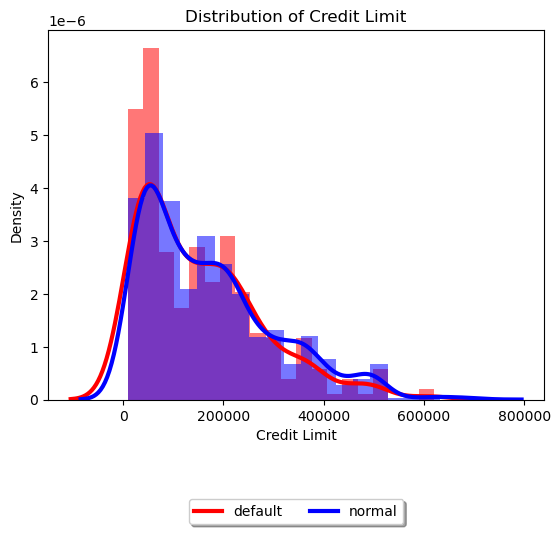

In [ ]:
# credit limit
df_name = pd.DataFrame({'names': ['normal', 'default']})

plt.hist(
    df[df["Default payment next month"] == 1]["Credit Limit"],
    density=True,
    bins=20,
    color="#ff000088",
)
plt.hist(
    df[df["Default payment next month"] == 0]["Credit Limit"],
    density=True,
    bins=20,
    color="#0000ff88",
)
sns.kdeplot(
    df[df["Default payment next month"] == 1]["Credit Limit"], lw=3, color="#ff0000"
)
sns.kdeplot(
    df[df["Default payment next month"] == 0]["Credit Limit"], lw=3, color="#0000ff"
)
plt.legend(
    np.unique(df_name["names"]),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fancybox=True,
    shadow=True,
    ncol=3,
)
plt.title("Distribution of Credit Limit")
plt.show()


<!-- analysis of the graph -->

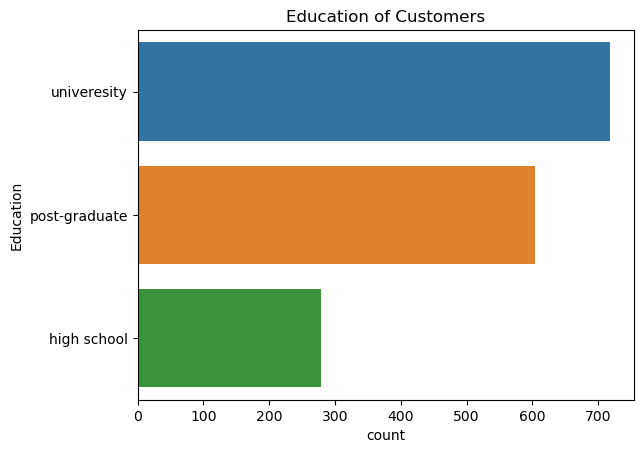

In [ ]:
sns.countplot(y=df['Education'])
plt.title("Education of Customers")
plt.show()


<!-- This part is used to comment on the analysis of the graph -->

- As we can see most of the customers are either post-graduates or university students while a small percentage are high-school students  
- for context high school students are typically 14-18 while university students are around 18-22
- another minor issue is that university is spelt wrongly, we could change that later

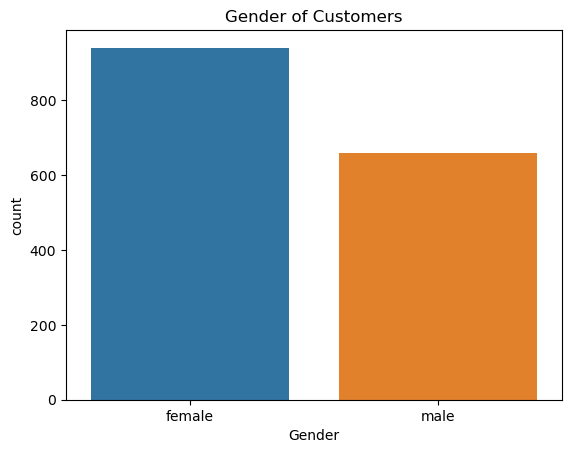

In [ ]:
sns.countplot(x='Gender', data = df)
plt.title("Gender of Customers")
plt.show()

- the customer's gender are roughly around the same amount with slightly more females compared to males 
- there seem to be around 200-300 more females than guys

In [ ]:
# sns.displot(x='Amount Owed 1 month ago', kde=True, height=8, data=df1)
# sns.displot(x='Amount Owed 2 month ago', kde=True, height=8, data=df1)
# sns.displot(x='Amount Owed 3 month ago', kde=True, height=8, data=df1)

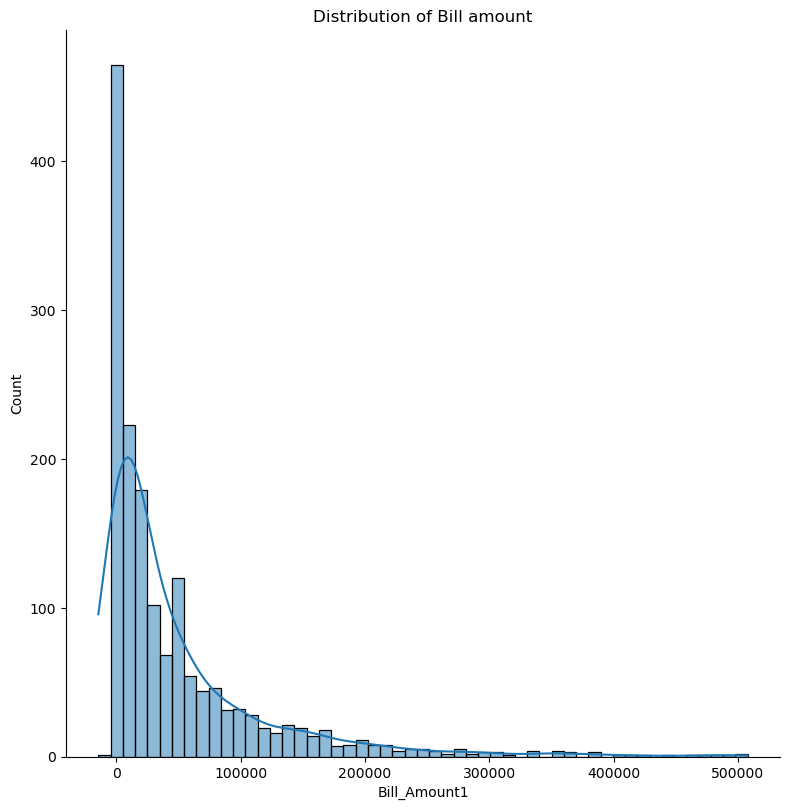

In [ ]:
# bill 1 graph
sns.displot(x='Bill_Amount1', kde=True, height=8, data=df)
plt.title('Distribution of Bill amount')
plt.show()



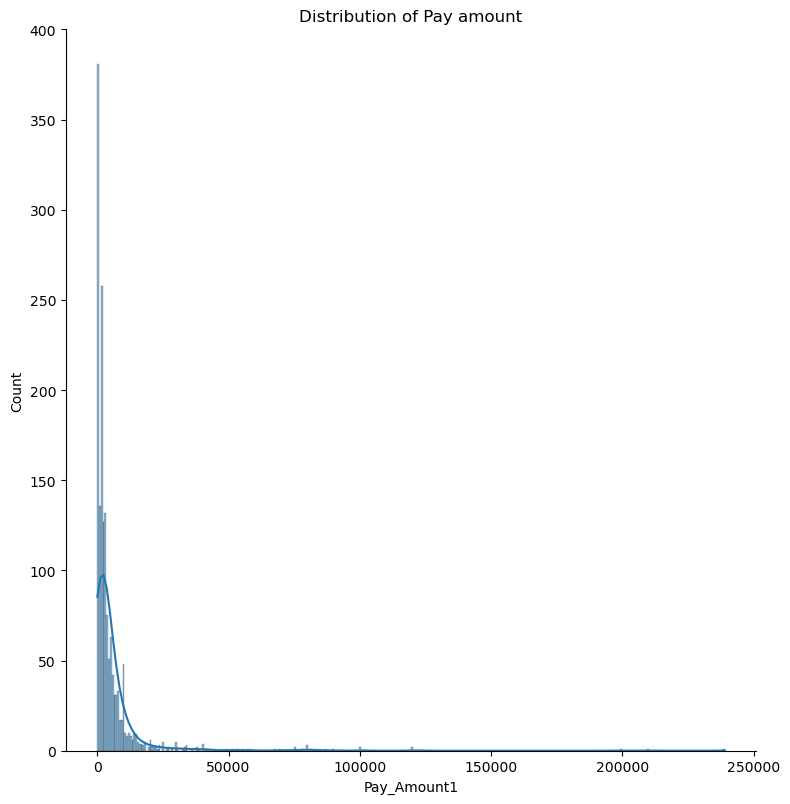

In [ ]:
# payed 1 graph
sns.displot(x='Pay_Amount1', kde=True, height=8, data=df)
plt.title('Distribution of Pay amount')
plt.show()


<!-- Analysis of both the Bill Amount and Pay Amount and link to why we must use standardization -->

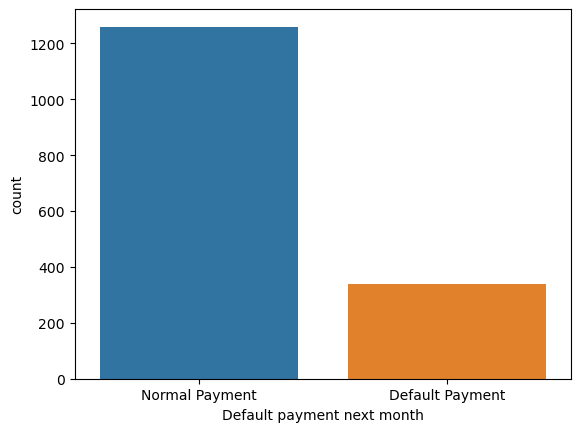

In [ ]:
labels = ['Normal Payment','Default Payment']

ax = sns.countplot(x = 'Default payment next month', data = df)
ax.set_xticklabels(labels=labels)
plt.show()

**<h2>Bivariate Analysis**

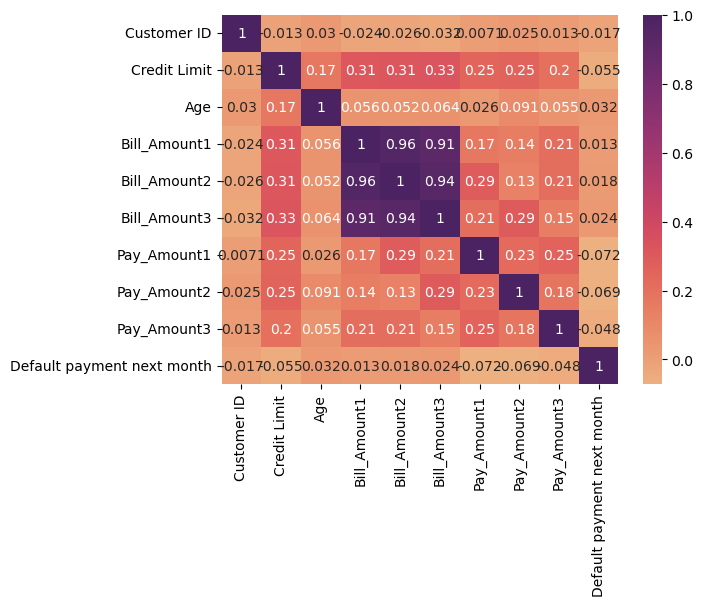

In [ ]:
# new_df
df = pd.read_csv('../CA1/credit_dataset.csv')

corr = df.corr()

sns.heatmap(corr, annot=True, cmap='flare')
plt.show()

<!-- for the analysis of each graph -->

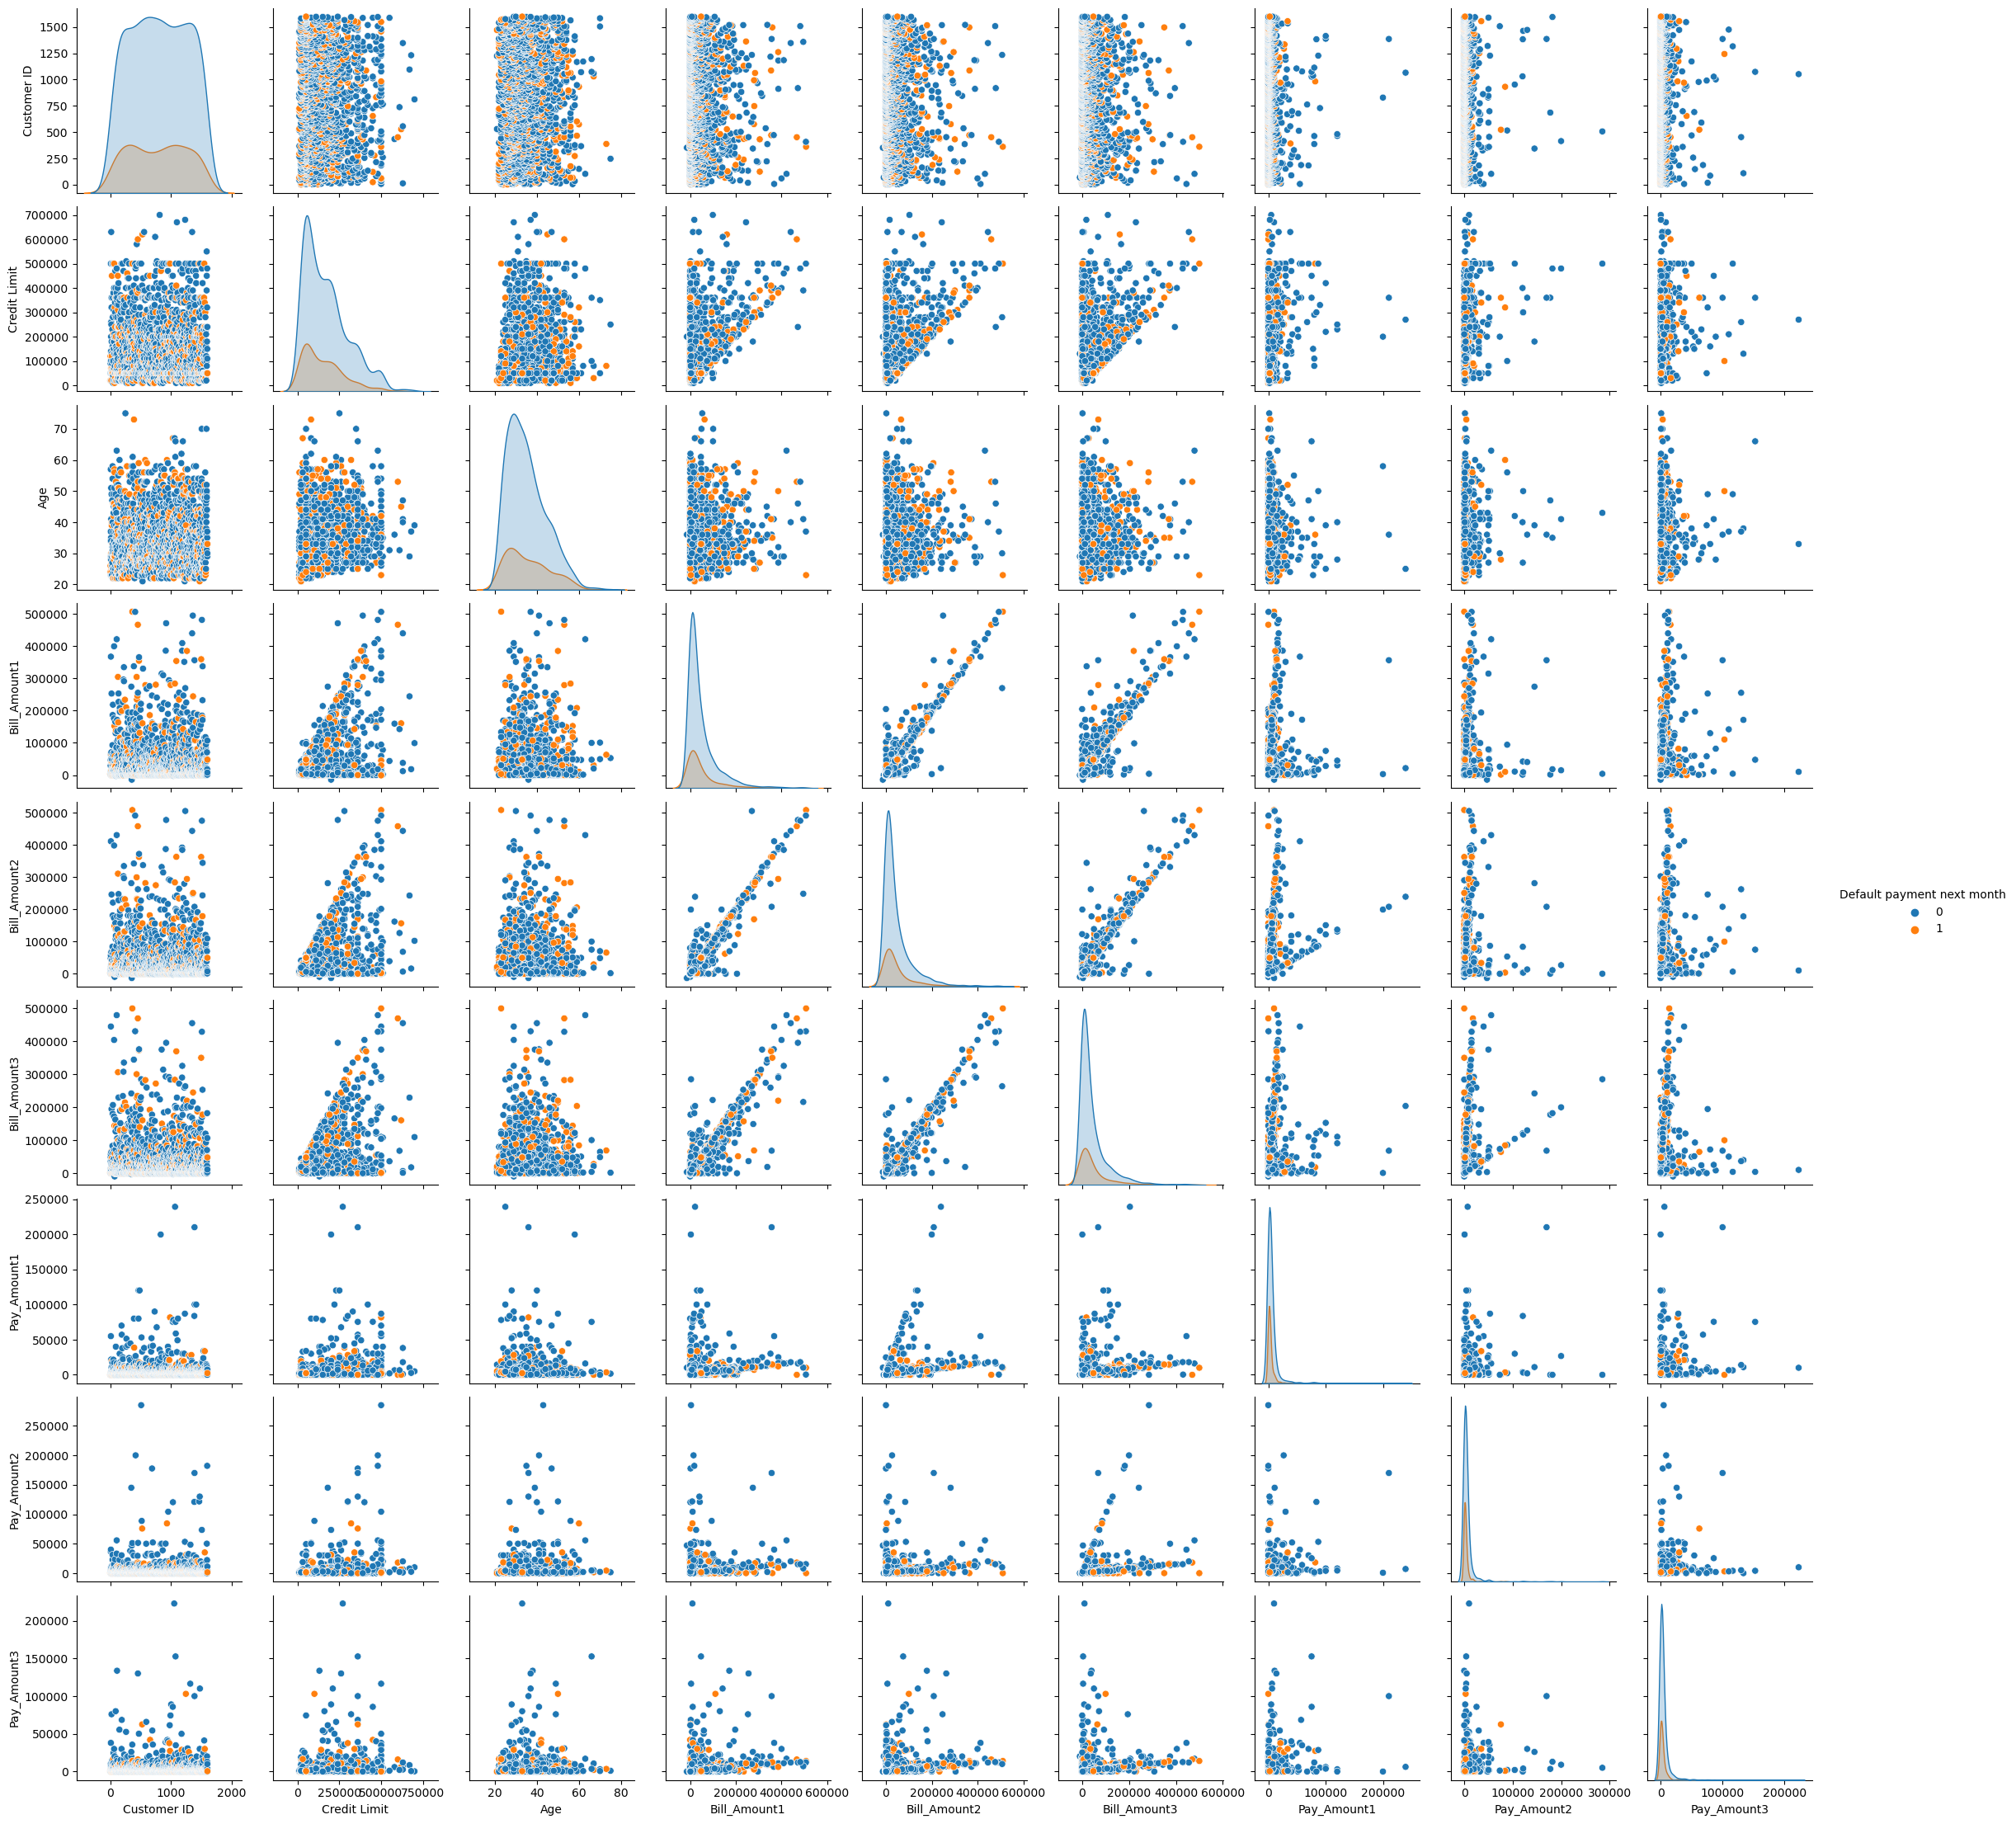

In [ ]:
sns.pairplot(data = df, hue= 'Default payment next month')
plt.show()

<!-- for the analysis of each graph -->

***<h1>data preprocessing</h1>***  



steps
- train-test split 
- encode data 
- oversampling
- feature engineering
- standardization 

<!-- ***<h3>Feature Engineering</h3>*** -->

- through the analysis of the data we can see that there are a few features we can add together to make a new feature that could help with the classification  
- namely i wanted to find out the total owed by the customer   
- the equation is  
                  Total Owed = (bill1 + bill2 + bill3) - (payed1 + payed2 + payed3)





In [ ]:
# Feature engineering
df['Total_Amount_Owed'] = (df['Bill_Amount1'] + df['Bill_Amount2'] + df['Bill_Amount3']) - (df['Pay_Amount1'] + df['Pay_Amount2'] + df['Pay_Amount3'])

df = df[['Credit Limit', 'Gender', 'Education', 'Marriage Status', 'Age', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Total_Amount_Owed', 'Default payment next month']]

# create a new column for the condition if they passed the credit limit and put a yes or no
# remove the no row 
# and the drop that column
df

,Credit Limit,Gender,Education,Marriage Status,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,Bill_Amount1,Bill_Amount2,Bill_Amount3,Total_Amount_Owed,Default payment next month
0,20000,female,univeresity,married,24,0,689,0,3913,3102,689,7015,1
1,120000,female,univeresity,single,26,0,1000,1000,2682,1725,2682,5089,1
2,90000,female,univeresity,single,34,1518,1500,1000,29239,14027,13559,52807,0
3,50000,female,univeresity,married,37,2000,2019,1200,46990,48233,49291,139295,0
4,50000,male,univeresity,married,57,2000,36681,10000,8617,5670,35835,1441,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,480000,female,univeresity,married,35,0,182123,12960,18214,11031,182123,16285,0
1596,150000,female,univeresity,married,37,0,2772,0,1184,794,2756,1962,0
1597,110000,female,post-graduate,single,29,7845,4000,4000,107195,109443,106637,307430,0
1598,240000,male,post-graduate,single,30,7305,11263,10018,7744,7284,11234,-2324,0


In [ ]:
# encode entire dataset
df
categorical_column = 'Gender'
unique_values = df[categorical_column].unique()

# Use LabelEncoder to encode the categorical column
encoder = LabelEncoder()
df[categorical_column] = encoder.fit_transform(df[categorical_column])

# Access the encoded categorical values and their corresponding numerical values
category = encoder.classes_
codes = encoder.transform(category)

for i, category in enumerate(category):
    print(f"{category} - {codes[i]}")


# for Education
unique_values = df['Education'].unique()
categorical_column = 'Education'
df[categorical_column] = encoder.fit_transform(df[categorical_column])

category = encoder.classes_
codes = encoder.transform(category)
print()
for i, category in enumerate(category):
    print(f"{category} - {codes[i]}")


# for Maritial status
unique_values = df['Marriage Status'].unique()
categorical_column = 'Marriage Status'
df[categorical_column] = encoder.fit_transform(df[categorical_column])

category = encoder.classes_
codes = encoder.transform(category)

print()
for i, category in enumerate(category):
    print(f"{category} - {codes[i]}")

female - 0
male - 1

high school - 0
post-graduate - 1
univeresity - 2

married - 0
single - 1


i use robustscaler so don't need to normalise the data

In [ ]:
# using a scaler to standardize the data due to the outliers present in the dataset
# maybe scaling the data will help with the outliers and improve predictions
# RobustScaler try using it 

scaler = RobustScaler()
columns_to_scale = ['Credit Limit', 'Age' , 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Total_Amount_Owed']

scaled_data = scaler.fit_transform(df[columns_to_scale])

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

df_scaled = pd.concat([df.drop(columns_to_scale, axis=1), scaled_df], axis=1)


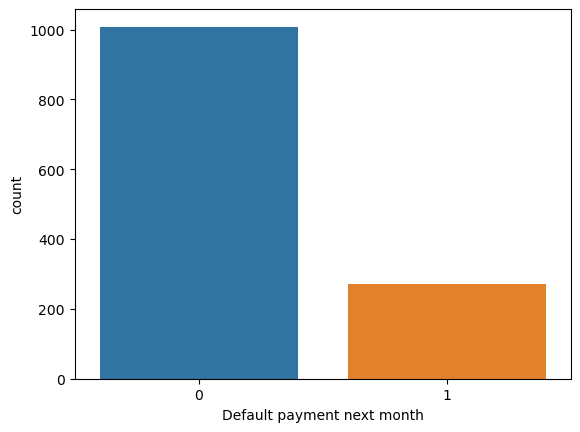

In [ ]:
# before we split the data i need to fix the typo in Univerity first to prevent further confusion in the future
df['Education'] = df['Education'].replace('univeresity', 'University')

# choosing my target and the feature used to predict that feature
features = df_scaled.drop(['Default payment next month'], axis = 1)
target = df_scaled[['Default payment next month']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,stratify = target)

# Reset the index of each dataframe
X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


sns.countplot(x = 'Default payment next month', data = y_train)
plt.show()


In [ ]:
# standardization of the data 
# Since some of the data has extreme outliers it might affect the prediction and maybe even affect the oversampling
# hence we standardiz it to make it deviate less 

# scaler = StandardScaler()

# X_train


*as we can see there is a huge differnce in our normal payment and default payment values for our train dataframe which might affect the precision of our prediction hence i decided to use SMOTE to increase the number of our minority group in a balanced way* 

Why i use SMOTE_NC instead of the other methods

Before using SMOTE_NC some values actually cannot pass through the model so i decided to use a label encoder to change the categorical values to interger values for columns such as  

- Gender 
- Education
- marriage status

In [ ]:
X_test

,Gender,Education,Marriage Status,Credit Limit,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,Bill_Amount1,Bill_Amount2,Bill_Amount3,Total_Amount_Owed
0,0,2,1,-0.111111,0.076923,-0.481597,-0.403492,-0.284484,-0.343463,-0.345023,-0.370471,-0.325769
1,1,0,0,-0.444444,1.153846,0.204800,0.630941,0.314430,0.418722,0.384702,0.413625,0.433755
2,0,2,1,0.222222,-0.307692,-0.168242,0.729146,2.396051,-0.100496,-0.077124,0.010721,-0.111732
3,0,2,1,-0.500000,-0.769231,-0.043895,1.221872,4.158606,1.312286,0.354528,-0.240697,0.439403
4,1,1,1,-0.500000,-0.615385,-0.168242,0.023278,0.049424,-0.083341,-0.059669,-0.023993,-0.034032
...,...,...,...,...,...,...,...,...,...,...,...,...
315,0,0,1,0.500000,0.923077,1.945660,1.720660,1.771962,3.442579,3.668104,4.093653,3.909063
316,1,2,0,0.055556,1.230769,0.723328,0.508244,-0.348085,0.598916,0.679914,0.328461,0.588121
317,0,0,0,0.000000,-0.307692,0.579085,2.667798,-0.348085,1.299646,1.382203,1.220405,1.356552
318,0,0,0,-0.666667,1.461538,-0.143372,-0.073715,-0.083079,-0.138947,-0.114436,-0.096448,-0.094313


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,stratify = target)

# # Select the categorical column i want to encode
# categorical_column = 'Gender'
# unique_values = df[categorical_column].unique()

# # Use LabelEncoder to encode the categorical column
# encoder = LabelEncoder()
# X_train[categorical_column] = encoder.fit_transform(X_train[categorical_column])

# # Access the encoded categorical values and their corresponding numerical values
# category = encoder.classes_
# codes = encoder.transform(category)

# for i, category in enumerate(category):
#     print(f"{category} - {codes[i]}")


# # for Education
# unique_values = df['Education'].unique()
# categorical_column = 'Education'
# X_train[categorical_column] = encoder.fit_transform(X_train[categorical_column])

# category = encoder.classes_
# codes = encoder.transform(category)
# print()
# for i, category in enumerate(category):
#     print(f"{category} - {codes[i]}")


# # for Maritial status
# unique_values = df['Marriage Status'].unique()
# categorical_column = 'Marriage Status'
# X_train[categorical_column] = encoder.fit_transform(X_train[categorical_column])

# category = encoder.classes_
# codes = encoder.transform(category)

# print()
# for i, category in enumerate(category):
#     print(f"{category} - {codes[i]}")


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,stratify = target)

# # Select the categorical column i want to encode
# categorical_column = 'Gender'
# unique_values = df[categorical_column].unique()

# # Use LabelEncoder to encode the categorical column
# encoder = LabelEncoder()
# X_test[categorical_column] = encoder.fit_transform(X_test[categorical_column])

# # Access the encoded categorical values and their corresponding numerical values
# category = encoder.classes_
# codes = encoder.transform(category)

# for i, category in enumerate(category):
#     print(f"{category} - {codes[i]}")


# # for Education
# unique_values = df['Education'].unique()
# categorical_column = 'Education'
# X_test[categorical_column] = encoder.fit_transform(X_test[categorical_column])

# category = encoder.classes_
# codes = encoder.transform(category)
# print()
# for i, category in enumerate(category):
#     print(f"{category} - {codes[i]}")


# # for Maritial status
# unique_values = df['Marriage Status'].unique()
# categorical_column = 'Marriage Status'
# X_test[categorical_column] = encoder.fit_transform(X_test[categorical_column])

# category = encoder.classes_
# codes = encoder.transform(category)

# print()
# for i, category in enumerate(category):
#     print(f"{category} - {codes[i]}")



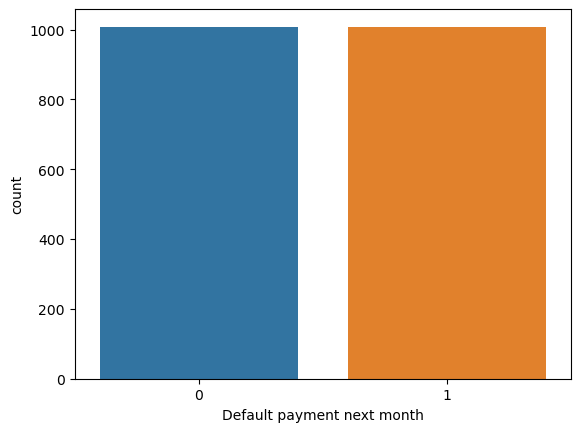

In [ ]:
# sm = SMOTE()
# X_train_res, y_train_res = sm.fit_resample(X_train,y_train)
# X_train

# X_train_balanced = pd.concat([X_train, X_train_res], axis=0)
# y_train_balanced = pd.concat([y_train, y_train_res], axis=0)

cat_indices = [0,1,2]
count_indices = [3,4,5,6,7,8,9,10]

smote_nc = SMOTENC(categorical_features=cat_indices, k_neighbors=5, random_state=42)

X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)


sns.countplot(x = 'Default payment next month', data = y_resampled)
plt.show()

# clf = LogisticRegression().fit(X_train_res, y_train_res)
# Y_test_pred = clf.predict(X_test)

# pd.crosstab(pd.Series(Y_test_pred,name = "predicted"),
#             pd.Series(y_test['Default payment next month'], name = 'actual'))


<h5>Observations<h5> 

- *we finally made the number of default payments equal to those who never default payment. Now our training data can be more accurate as there is a larger sample*

In [ ]:
# X_train_res
X_resampled


,Gender,Education,Marriage Status,Credit Limit,Age,Pay_Amount1,Pay_Amount2,Pay_Amount3,Bill_Amount1,Bill_Amount2,Bill_Amount3,Total_Amount_Owed
0,0,2,1,-0.611111,-0.769231,-0.101840,-0.049467,-0.080429,0.120936,0.152685,0.179342,0.192970
1,1,2,0,0.333333,0.307692,0.577841,-0.461688,0.579436,1.448009,1.522070,1.616946,1.658040
2,0,1,1,1.222222,-0.384615,-0.541283,-0.461688,-0.348085,-0.291466,-0.349263,-0.375128,-0.304474
3,1,1,1,1.333333,0.692308,-0.531584,-0.461688,-0.348085,-0.207296,-0.210014,-0.375167,-0.221620
4,1,0,1,-0.055556,0.692308,1.058568,-0.461203,-0.099775,-0.330156,-0.236602,-0.375167,-0.325632
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0,2,1,-0.246630,-0.712585,0.294388,0.033336,0.158641,0.834909,0.884599,0.951632,0.972917
2012,0,0,0,0.816736,0.114902,8.157632,0.158377,-0.135507,-0.362981,0.236814,0.119133,-0.199771
2013,1,1,0,-0.174045,0.453876,-0.541283,0.051303,-0.346422,-0.341706,-0.345357,-0.332028,-0.321463
2014,0,1,0,1.272217,1.194502,2.448140,1.722861,1.297720,6.061390,4.771365,3.916342,5.247630


In [ ]:
# tune hyperparameter (maybe)

**<h3>Modelling and Evaluation**  

In [ ]:
# creating a model 
from sklearn.metrics import accuracy_score, precision_score, recall_score

results_df = pd.DataFrame(columns=['Model', 'Metric', 'Score (average)'])

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest ': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Ridge': RidgeClassifier(),
    'SGD': SGDClassifier()
}

# metrics = {
#     'Accuracy': accuracy_score,
#     'Precision': precision_score,
#     'Recall': recall_score
# }

scoring = ['accuracy', 'precision', 'recall', 'f1']

# cv_results = cross_validate(models, X_resampled, y_resampled, scoring=scoring, cv=5)

for name in models:
    model = models[name]
    cv_results = cross_validate(model, X_resampled, y_resampled, scoring=scoring, cv=5)
    # print(cv_results)
    for metric in scoring:
          for score in cv_results['test_{}'.format(metric)]:
            results_df = results_df.append({'model': name, 'metric': metric, 'score': score}, ignore_index=True)

# results_df

In [ ]:
# for name in models:
#     model = models[name]
#     cv_results = cross_validate(model, X_resampled, y_resampled, scoring=scoring, cv=5)
#     print('Model:', name)
#     print('{:<12}{:<12}{:<12}{:<12}{:<12}'.format('Metric', 'Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'))
#     for metric in scoring:
#         scores = cv_results['test_{}'.format(metric)]
#         print('{:<12}{:<12.4f}{:<12.4f}{:<12.4f}{:<12.4f}{:<12.4f}'.format(metric, *scores))
#     print('\n')



In [ ]:
import pandas as pd

results_df = pd.DataFrame(columns=['Model', 'Metric', 'Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])

for name in models:
    model = models[name]
    cv_results = cross_validate(model, X_resampled, y_resampled, scoring=scoring, cv=5)
    for metric in scoring:
        scores = cv_results['test_{}'.format(metric)]
        row = {'Model': name, 'Metric': metric, 'Fold 1': scores[0], 'Fold 2': scores[1], 'Fold 3': scores[2], 'Fold 4': scores[3], 'Fold 5': scores[4]}
        results_df = results_df.append(row, ignore_index=True)


pivot_df = pd.pivot_table(results_df, index='Model', columns='Metric', values=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
pivot_df
# single_column = pivot_df['Fold 1']
# single_column

recall_columns = pivot_df.filter(like='recall')
recall_columns

# results_df

# pivot_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Metric,recall,recall,recall,recall,recall
Model,,,,,
Ada Boost,0.509901,0.676617,0.741294,0.737624,0.668317
Decision Tree,0.549505,0.810945,0.830846,0.797030,0.806931
Extra Trees,0.707921,0.920398,0.955224,0.935644,0.900990
Gradient Boosting,0.435644,0.746269,0.875622,0.826733,0.831683
KNN,0.792079,0.940299,0.905473,0.886139,0.886139
Logistic Regression,0.653465,0.621891,0.636816,0.717822,0.683168
Random Forest,0.623762,0.860697,0.935323,0.915842,0.881188
Ridge,0.594059,0.587065,0.621891,0.702970,0.653465


In [ ]:
import pandas as pd

results_df = pd.DataFrame(columns=['Model', 'Metric', 'Score (average)'])

for name in models:
    model = models[name]
    cv_results = cross_validate(model, X_resampled, y_resampled, scoring=scoring, cv=5)
    for metric in scoring:
        scores = cv_results['test_{}'.format(metric)]
        row = {'Model': name, 'Metric': metric, 'Score (average)': scores.mean()}
        results_df = results_df.append(row, ignore_index=True)
        

# results_df.set_index('Model', inplace=True)

pivot_df = results_df.pivot(index='Model', columns='Metric', values='Score (average)')

pivot_df = pivot_df.rename_axis(None, axis=1).rename_axis(None, axis=0)

  
pivot_df
# results_df

,accuracy,f1,precision,recall
Ada Boost,0.674621,0.669530,0.678284,0.666750
Decision Tree,0.729689,0.733952,0.718024,0.760032
Extra Trees,0.846746,0.849365,0.830339,0.877095
Gradient Boosting,0.754528,0.742005,0.756548,0.743190
KNN,0.738606,0.770920,0.685645,0.882026
Logistic Regression,0.590287,0.617794,0.578737,0.662632
Random Forest,0.826430,0.824335,0.818584,0.840387
Ridge,0.577887,0.599135,0.569763,0.631890
SGD,0.576887,0.559083,0.600226,0.606054


*<h3>creating a baseline Model</h3>*

In [ ]:
dummy = DummyClassifier(strategy="stratified")
dummy.fit(X_train, y_train)
# y_pred = dummy_clf.predict(X_test)
print(f"Accuracy Score :{dummy.score(X_train, y_train)}")
scores = cross_validate(
    dummy,
    X_resampled,
    y_resampled,
    cv=5,
    scoring = scoring,
)

dummy_score = pd.DataFrame(scores)
dummy_score_mean = dummy_score.mean()
dummy_score = pd.DataFrame(dummy_score_mean)
dummy_score = dummy_score.T

dummy_score['index'] = ["Dummy Score"]
dummy_score.set_index('index', inplace = True)
dummy_score.rename_axis(None, inplace = True)


dummy_score = dummy_score.rename(columns={"test_accuracy": "accuracy", "test_precision": "precision", "test_recall": "recall", "test_f1":"f1"})
dummy_score = dummy_score.drop(columns=['fit_time', 'score_time'])
dummy_score = dummy_score[['accuracy', 'f1', 'precision', 'recall']]

dummy_score


Accuracy Score :0.6390625


,accuracy,f1,precision,recall
Dummy Score,0.506952,0.508531,0.508165,0.509965


In [ ]:
all_models = pd.concat([dummy_score, pivot_df])
all_models

,accuracy,f1,precision,recall
Dummy Score,0.506952,0.508531,0.508165,0.509965
Ada Boost,0.674621,0.669530,0.678284,0.666750
Decision Tree,0.729689,0.733952,0.718024,0.760032
Extra Trees,0.846746,0.849365,0.830339,0.877095
Gradient Boosting,0.754528,0.742005,0.756548,0.743190
KNN,0.738606,0.770920,0.685645,0.882026
Logistic Regression,0.590287,0.617794,0.578737,0.662632
Random Forest,0.826430,0.824335,0.818584,0.840387
Ridge,0.577887,0.599135,0.569763,0.631890
SGD,0.576887,0.559083,0.600226,0.606054


<!-- <h2>Learning Curve</h2> -->

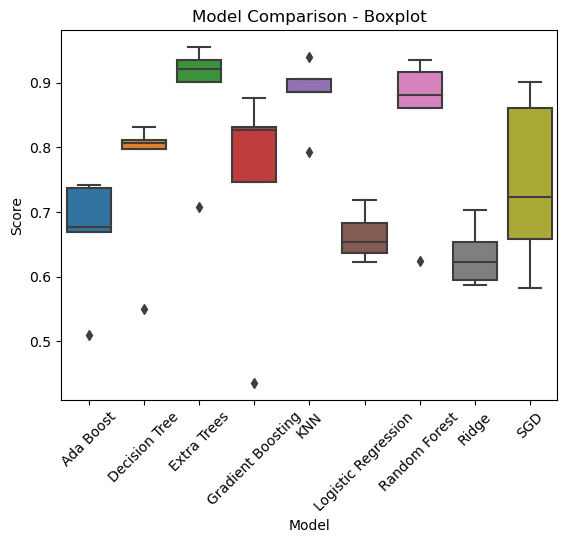

In [ ]:
# sns.violinplot(x=all_models.index , y='recall', data=all_models)
# plt.xlabel('Model')
# plt.ylabel('Score')

# recall_columns_transposed = recall_columns.transpose()
# recall_columns
# # plt.figure(figsize=(10, 6))
# # sns.boxplot(y = recall_columns_transposed['Ada Boost'])
# # plt.xlabel('Model')
# # plt.ylabel('Recall')
# # plt.title('Recall across Folds for Each Model')
# # plt.xticks(rotation=45)
# # plt.show()

# melted_df = recall_columns.melt(id_vars='Model', var_name='Fold', value_name='Recall')

df_transposed = recall_columns.T


data = []
for model in df_transposed.columns:
    # Get the data for the current model
    # data = recall_columns.loc[model]
    
    model_data = df_transposed[model]
    data.append(model_data)
    # sns.boxplot(data=data)

sns.boxplot(data=data)
plt.xticks(range(len(df_transposed.columns)), df_transposed.columns, rotation=45)

plt.title('Model Comparison - Boxplot')
plt.xlabel('Model')
plt.ylabel('Score')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the legend
# plt.legend()

# Show the plot
plt.show()


In [ ]:
# recall_columns.columns


In [ ]:
df_transposed

,Model,Ada Boost,Decision Tree,Extra Trees,Gradient Boosting,KNN,Logistic Regression,Random Forest,Ridge,SGD
,Metric,,,,,,,,,
Fold 1,recall,0.509901,0.549505,0.707921,0.435644,0.792079,0.653465,0.623762,0.594059,0.900990
Fold 2,recall,0.676617,0.810945,0.920398,0.746269,0.940299,0.621891,0.860697,0.587065,0.582090
Fold 3,recall,0.741294,0.830846,0.955224,0.875622,0.905473,0.636816,0.935323,0.621891,0.860697
Fold 4,recall,0.737624,0.797030,0.935644,0.826733,0.886139,0.717822,0.915842,0.702970,0.658416
Fold 5,recall,0.668317,0.806931,0.900990,0.831683,0.886139,0.683168,0.881188,0.653465,0.722772


**<h3>Model Improvement**

In [ ]:
model = ExtraTreesClassifier()

# Get all the parameters and their current values
params = model.get_params()

# List all the parameters
for param in sorted(params.keys()):
    print(param)

bootstrap
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


*Hyperparameter tuning*

In [ ]:
model = ExtraTreesClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    # 'criterion': ['gini', 'entropy'],
    # 'max_depth': [None, 5, 10],
    'min_samples_split': [1, 2, 5],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', None],
    # 'bootstrap': [True, False]
}

# Step 4: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=5)
# grid_search = GridSearchCV(model, param_grid, cv=5)

# Step 5: Fit the GridSearchCV object to your data
grid_search.fit(X_resampled, y_resampled)

# Step 6: Access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print("Best Parameters: ", grid_search.best_params_)


# Step 7: Use the best model for prediction or further analysis
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)
# accuracy = classification_report(y_test, y_pred)
# print("Best Model Accuracy:", accuracy)

print("Best Model params:", best_params)
print("Best Model score:", best_score)
print("Best Model model:", best_model)
# print(y_pred)

Best Model params: {'max_features': None, 'min_samples_split': 1, 'n_estimators': 300}
Best Model score: 0.8889709866509039
Best Model model: ExtraTreesClassifier(max_features=None, min_samples_split=1, n_estimators=300,
                     random_state=42)


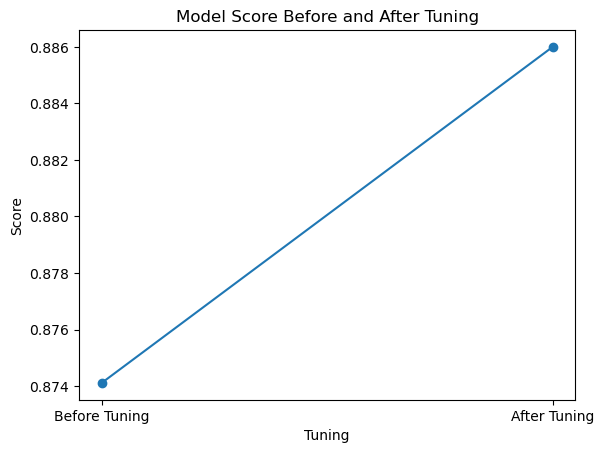

In [ ]:
model1 = ExtraTreesClassifier(**best_params)
model2 = ExtraTreesClassifier()

model1.fit(X_resampled, y_resampled)
model2.fit(X_resampled, y_resampled)

scores_before_tuning = cross_val_score(model2, X_resampled, y_resampled, scoring='recall')
scores_after_tuning = cross_val_score(model1, X_resampled, y_resampled, scoring='recall')

labels = ['Before Tuning', 'After Tuning']
scores = [scores_before_tuning.mean(), scores_after_tuning.mean()]

plt.plot(labels, scores, marker='o')
plt.xlabel('Tuning')
plt.ylabel('Score')
plt.title('Model Score Before and After Tuning')
plt.show()


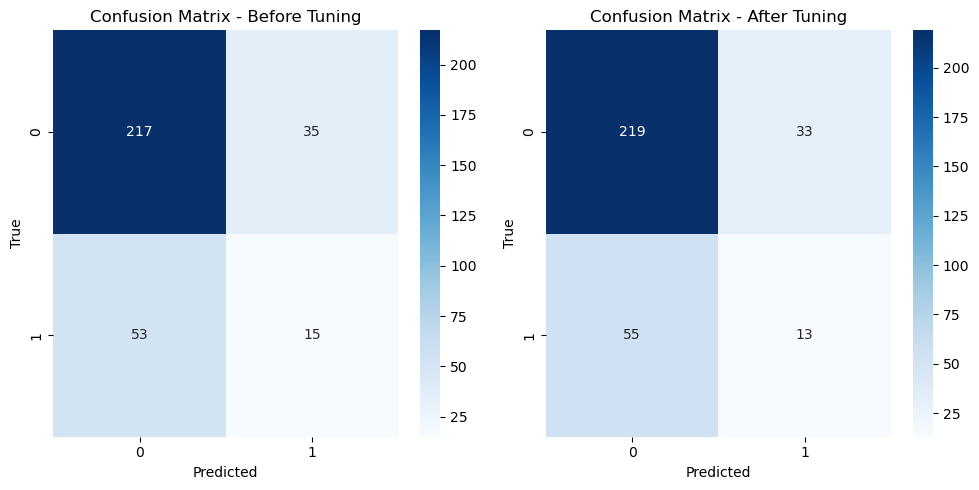

In [ ]:

# Predictions before tuning
y_pred_before_tuning = model2.predict(X_test)

# Predictions after tuning
# y_pred = best_model.predict(X_test)

y_pred_after_tuning = model1.predict(X_test)

# Compute confusion matrices
cm_before_tuning = confusion_matrix(y_test, y_pred_before_tuning)
cm_after_tuning = confusion_matrix(y_test, y_pred_after_tuning)

# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before_tuning, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix - Before Tuning')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

sns.heatmap(cm_after_tuning, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Confusion Matrix - After Tuning')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
y_pred_before_tuning.shape

(320,)

In [ ]:
y_test.shape
X_resampled

(320, 1)

*HyperParameter Tuning for Random Forest*

In [ ]:
model = RandomForestClassifier()

# Get all the parameters and their current values
params = model.get_params()

# List all the parameters
for param in sorted(params.keys()):
    print(param)


bootstrap
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


In [ ]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [300, 500],
    # 'max_depth': [None, 5, 10],
    # 'min_samples_split': [1, 2, 5],
    'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', None],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')

grid_search.fit(X_resampled, y_resampled)

# Step 6: Access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)
# accuracy = classification_report(y_test, y_pred)
# print("Best Model Accuracy:", accuracy)

print("Best Model params:", best_params)
print("Best Model score:", best_score)
print("Best Model model:", best_model)

Best Parameters:  {'min_samples_leaf': 1, 'n_estimators': 500}
Best Model params: {'min_samples_leaf': 1, 'n_estimators': 500}
Best Model score: 0.8473178661149697
Best Model model: RandomForestClassifier(n_estimators=500, random_state=42)


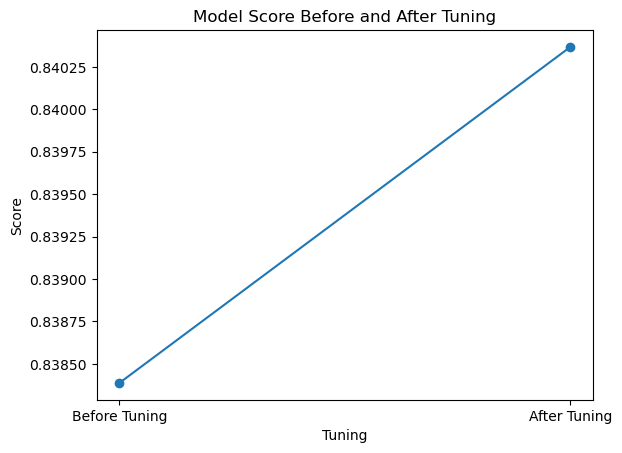

In [ ]:
model1 = RandomForestClassifier(**best_params)
model2 = RandomForestClassifier()

model1.fit(X_resampled, y_resampled)
model2.fit(X_resampled, y_resampled)

scores_before_tuning = cross_val_score(model2, X_resampled, y_resampled, scoring='recall')
scores_after_tuning = cross_val_score(model1, X_resampled, y_resampled, scoring='recall')

labels = ['Before Tuning', 'After Tuning']
scores = [scores_before_tuning.mean(), scores_after_tuning.mean()]

plt.plot(labels, scores, marker='o')
plt.xlabel('Tuning')
plt.ylabel('Score')
plt.title('Model Score Before and After Tuning')
plt.show()

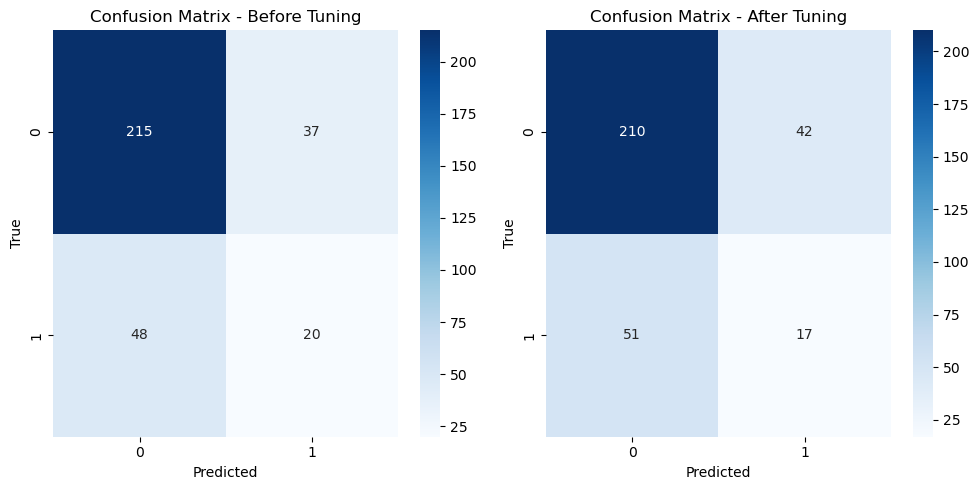

In [ ]:
# Predictions before tuning
y_pred_before_tuning = model2.predict(X_test)

# Predictions after tuning
# y_pred = best_model.predict(X_test)

y_pred_after_tuning = model1.predict(X_test)

# Compute confusion matrices
cm_before_tuning = confusion_matrix(y_test, y_pred_before_tuning)
cm_after_tuning = confusion_matrix(y_test, y_pred_after_tuning)

# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_before_tuning, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix - Before Tuning')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

sns.heatmap(cm_after_tuning, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Confusion Matrix - After Tuning')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

plt.tight_layout()
plt.show()


**<h3>References**

- SMOTE_NC  
https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5